In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


Removed "name" column since we are not interested on individuals

In [182]:
dataset = pd.read_csv("coursework_dataset.csv")
dataset= dataset.drop('name',axis=1)
dataset

area  postcode  age         dob  gender marital_status          qualifications                                        occupation  num_children  income  on_benefits  home_ownership  credit_score
0                   Nottingham   NG9 5SS   35  1988-10-11  Female        married   Level 3 (High school)                                     No occupation             0     106            1               0           406
1                     Rushmoor  GU14 1NU   64  1959-02-13    Male        married          Apprenticeship          8. Process, plant and machine operatives             4   47506            0               0           443
2                     Redditch   B97 9DO   47  1976-03-16    Male        married  Level 4 (BA+) or above  6. Caring, leisure and other service occupations             1   48611            0               1           952
3      Staffordshire Moorlands  ST15 1UQ   80  1943-09-26    Male  never_married  Level 4 (BA+) or above                         9. Elementary occupations             0   45199            0               1           810
4         Barking and Dagenham  RM10 3DJ   35  1988-06-14    Male        married        Level 1 (School)                                     No occupation             0   10771            1               0           171
...                        ...       ...  ...         ...     ...            ...                     ...                                               ...           ...     ...          ...             ...           ...
99995               Birmingham   B14 0CB   22  2001-05-09  Female  never_married   Level 3 (High school)                                     No occupation             0       0            1               0           540
99996                Runnymede  KT13 5AZ   58  1964-11-09  Female       divorced   Level 3 (High school)  6. Caring, leisure and other service occupations             1   48381            0               1           805
99997              Test Valley   SP4 5NB   83  1940-05-05  Female        married   Level 3 (High school)     4. Administrative and secretarial occupations             1   53823            0               1           989
99998            County Durham   DH3 1UY   70  1953-06-09  Female        married                   Other         7. Sales and customer service occupations             3   32377            0               1           630
99999                  Norwich   NR4 0MG   61  1962-03-31    Male        married        Level 2 (School)       1. Managers, directors and senior officials             0   44176            0               1           999

[100000 rows x 13 columns]

In [183]:
def drawHist(df: pd.DataFrame):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
    fig.subplots_adjust(hspace=0.8, wspace=0.8)
    axes = axes.ravel()

    for i, column in enumerate(df.columns):
        df[column].value_counts().plot(kind='bar', ax=axes[i], title=column)
    
    plt.show()


In [184]:
# drawHist(dataset)

In [185]:
corr_matrix = dataset[['income','on_benefits']].corr()
corr_matrix.loc['income','on_benefits']

-0.5873247942438125

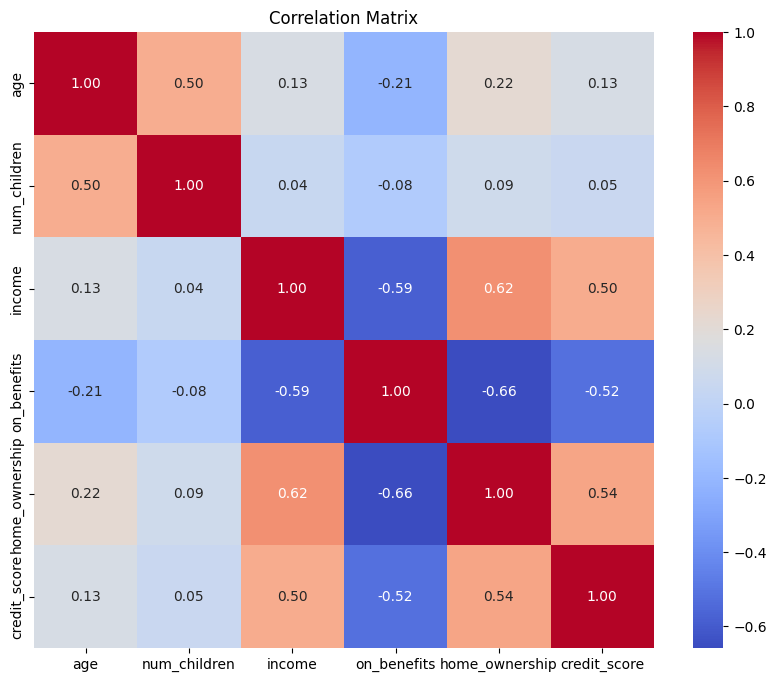

In [186]:
numeric_data = dataset.select_dtypes(include=['float64', 'int64']) # Select only numeric columns
correlation_matrix = numeric_data.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

    '''Returns the list of sizes of the equivalence classes in the dataset.'''
    Number of people with same quasi-attributes

In [103]:
def size_equivalence_classes(dataset : pd.DataFrame):
    # Select columns except "income", "credit_score", "on_benefits"
    quasies = dataset[[col for col in dataset.columns if col not in ["income", "credit_score", "on_benefits"]]]
    # Group by the selected columns and calculate the size of each group
    copyDataset = dataset.groupby(quasies.columns.tolist())
    
    # Print the resulting DataFrame
    # copyDataset
    
    # Return the 'Size' column
    return [len(g[1]) for g in copyDataset]
    

In [104]:
eq_class = size_equivalence_classes(dataset)
print("Max: " , max(eq_class))
print("Min: " , min(eq_class))

Max:  1
Min:  1


Dob is the same information as the age
postcode is the same information as the area

In [105]:
dataset = dataset.drop(['postcode','dob'], axis=1)

In [106]:
# drawHist(dataset)

In [107]:
dataset

area  age  gender marital_status          qualifications                                        occupation  num_children  income  on_benefits  home_ownership  credit_score
0                   Nottingham   35  Female        married   Level 3 (High school)                                     No occupation             0     106            1               0           406
1                     Rushmoor   64    Male        married          Apprenticeship          8. Process, plant and machine operatives             4   47506            0               0           443
2                     Redditch   47    Male        married  Level 4 (BA+) or above  6. Caring, leisure and other service occupations             1   48611            0               1           952
3      Staffordshire Moorlands   80    Male  never_married  Level 4 (BA+) or above                         9. Elementary occupations             0   45199            0               1           810
4         Barking and Dagenham   35    Male        married        Level 1 (School)                                     No occupation             0   10771            1               0           171
...                        ...  ...     ...            ...                     ...                                               ...           ...     ...          ...             ...           ...
99995               Birmingham   22  Female  never_married   Level 3 (High school)                                     No occupation             0       0            1               0           540
99996                Runnymede   58  Female       divorced   Level 3 (High school)  6. Caring, leisure and other service occupations             1   48381            0               1           805
99997              Test Valley   83  Female        married   Level 3 (High school)     4. Administrative and secretarial occupations             1   53823            0               1           989
99998            County Durham   70  Female        married                   Other         7. Sales and customer service occupations             3   32377            0               1           630
99999                  Norwich   61    Male        married        Level 2 (School)       1. Managers, directors and senior officials             0   44176            0               1           999

[100000 rows x 11 columns]

In [108]:
eq_class=size_equivalence_classes(dataset)
print("Max: " , max(eq_class))
print("Min: " , min(eq_class))

Max:  13
Min:  1


Find which rows to be removed to achieve k-anon

In [109]:
def to_be_removed(k: int,dataset: pd.DataFrame):
    
    result = []
       
    quasies = dataset[[col for col in dataset.columns if col not in ["income", "credit_score", "on_benefits"]]]
    print(quasies.columns.tolist())
    # Group by the selected columns and calculate the size of each group
    grouped = dataset.groupby(quasies.columns.tolist())
    
    for group in grouped:
        equivalence_class = group[1]
        if len(equivalence_class)<k:
            for row_index in equivalence_class.index:
                result.append(row_index)
                
    return result

Which attribute messes k-anonymity

In [110]:
def least_impact_on_k_anonymity(dataset: pd.DataFrame):
    """
    Function to identify which column has the least impact on k-anonymity,
    thus being the worst at maintaining privacy.
    
    Args:
    dataset (pd.DataFrame): The dataset to be evaluated.
    
    Returns:
    str: The name of the column that has the least impact on k-anonymity.
    int: The size of the smallest group in that column.
    """
    # Initialize the dictionary to hold the minimum group size for each column
    min_group_sizes = {}
    quasies = dataset[[col for col in dataset.columns if col not in ["income_category", "credit_score_range", "income", "credit_score" ,"on_benefits",'area']]]
    # Iterate over each column in the dataset
    for col in quasies:
        # Group by the column and count the number of occurrences of each value
        group_sizes = dataset.groupby(col).size()
        # Find the smallest group size for the column
        min_group_sizes[col] = group_sizes.min()
    
    # Find the column with the smallest minimum group size, which is worst for k-anonymity
    least_impactful_column = min(min_group_sizes, key=min_group_sizes.get)
    
    # Return the column name with the smallest minimum group size
    return least_impactful_column, min_group_sizes[least_impactful_column]

17 - 27
28 - 38
39 - 49
50 - 60
62 - 72
73 - 90

Age range

In [111]:
# Define the age bins and labels
bins = [16, 27, 38, 49, 60, 72, 90]
labels = ['17-27', '28-38', '39-49', '50-60', '61-72', '73-90']

# Categorize ages into the defined bins
dataset['age_range'] = pd.cut(dataset['age'], bins=bins, labels=labels, right=True)

In [112]:
dataset = dataset.drop('age',axis = 1)

['0', '1', '2-3', '4-9']

Children range

In [113]:
# Define the age bins and labels
bins = [-1, 0, 1, 3, 9]
labels = ['0', '1', '2-3', '4-9']

# Categorize ages into the defined bins
dataset['num_children_range'] = pd.cut(dataset['num_children'], bins=bins, labels=labels, right=True)

In [114]:
dataset = dataset.drop('num_children',axis = 1)

Income range

In [115]:
income_bins = list(range(0, int(dataset['income'].max()) + 5000, 5000))

# Generate the labels based on the bins
income_labels = [f"{i}-{i + 4999}" for i in income_bins[:-1]]

# Categorize incomes into the defined bins
dataset['income_category'] = pd.cut(dataset['income'], bins=income_bins, labels=income_labels, right=False)


In [116]:
dataset = dataset.drop('income',axis=1)

In [117]:
eq_class=size_equivalence_classes(dataset)
print("Max: " , max(eq_class))
print("Min: " , min(eq_class))

Max:  25
Min:  1


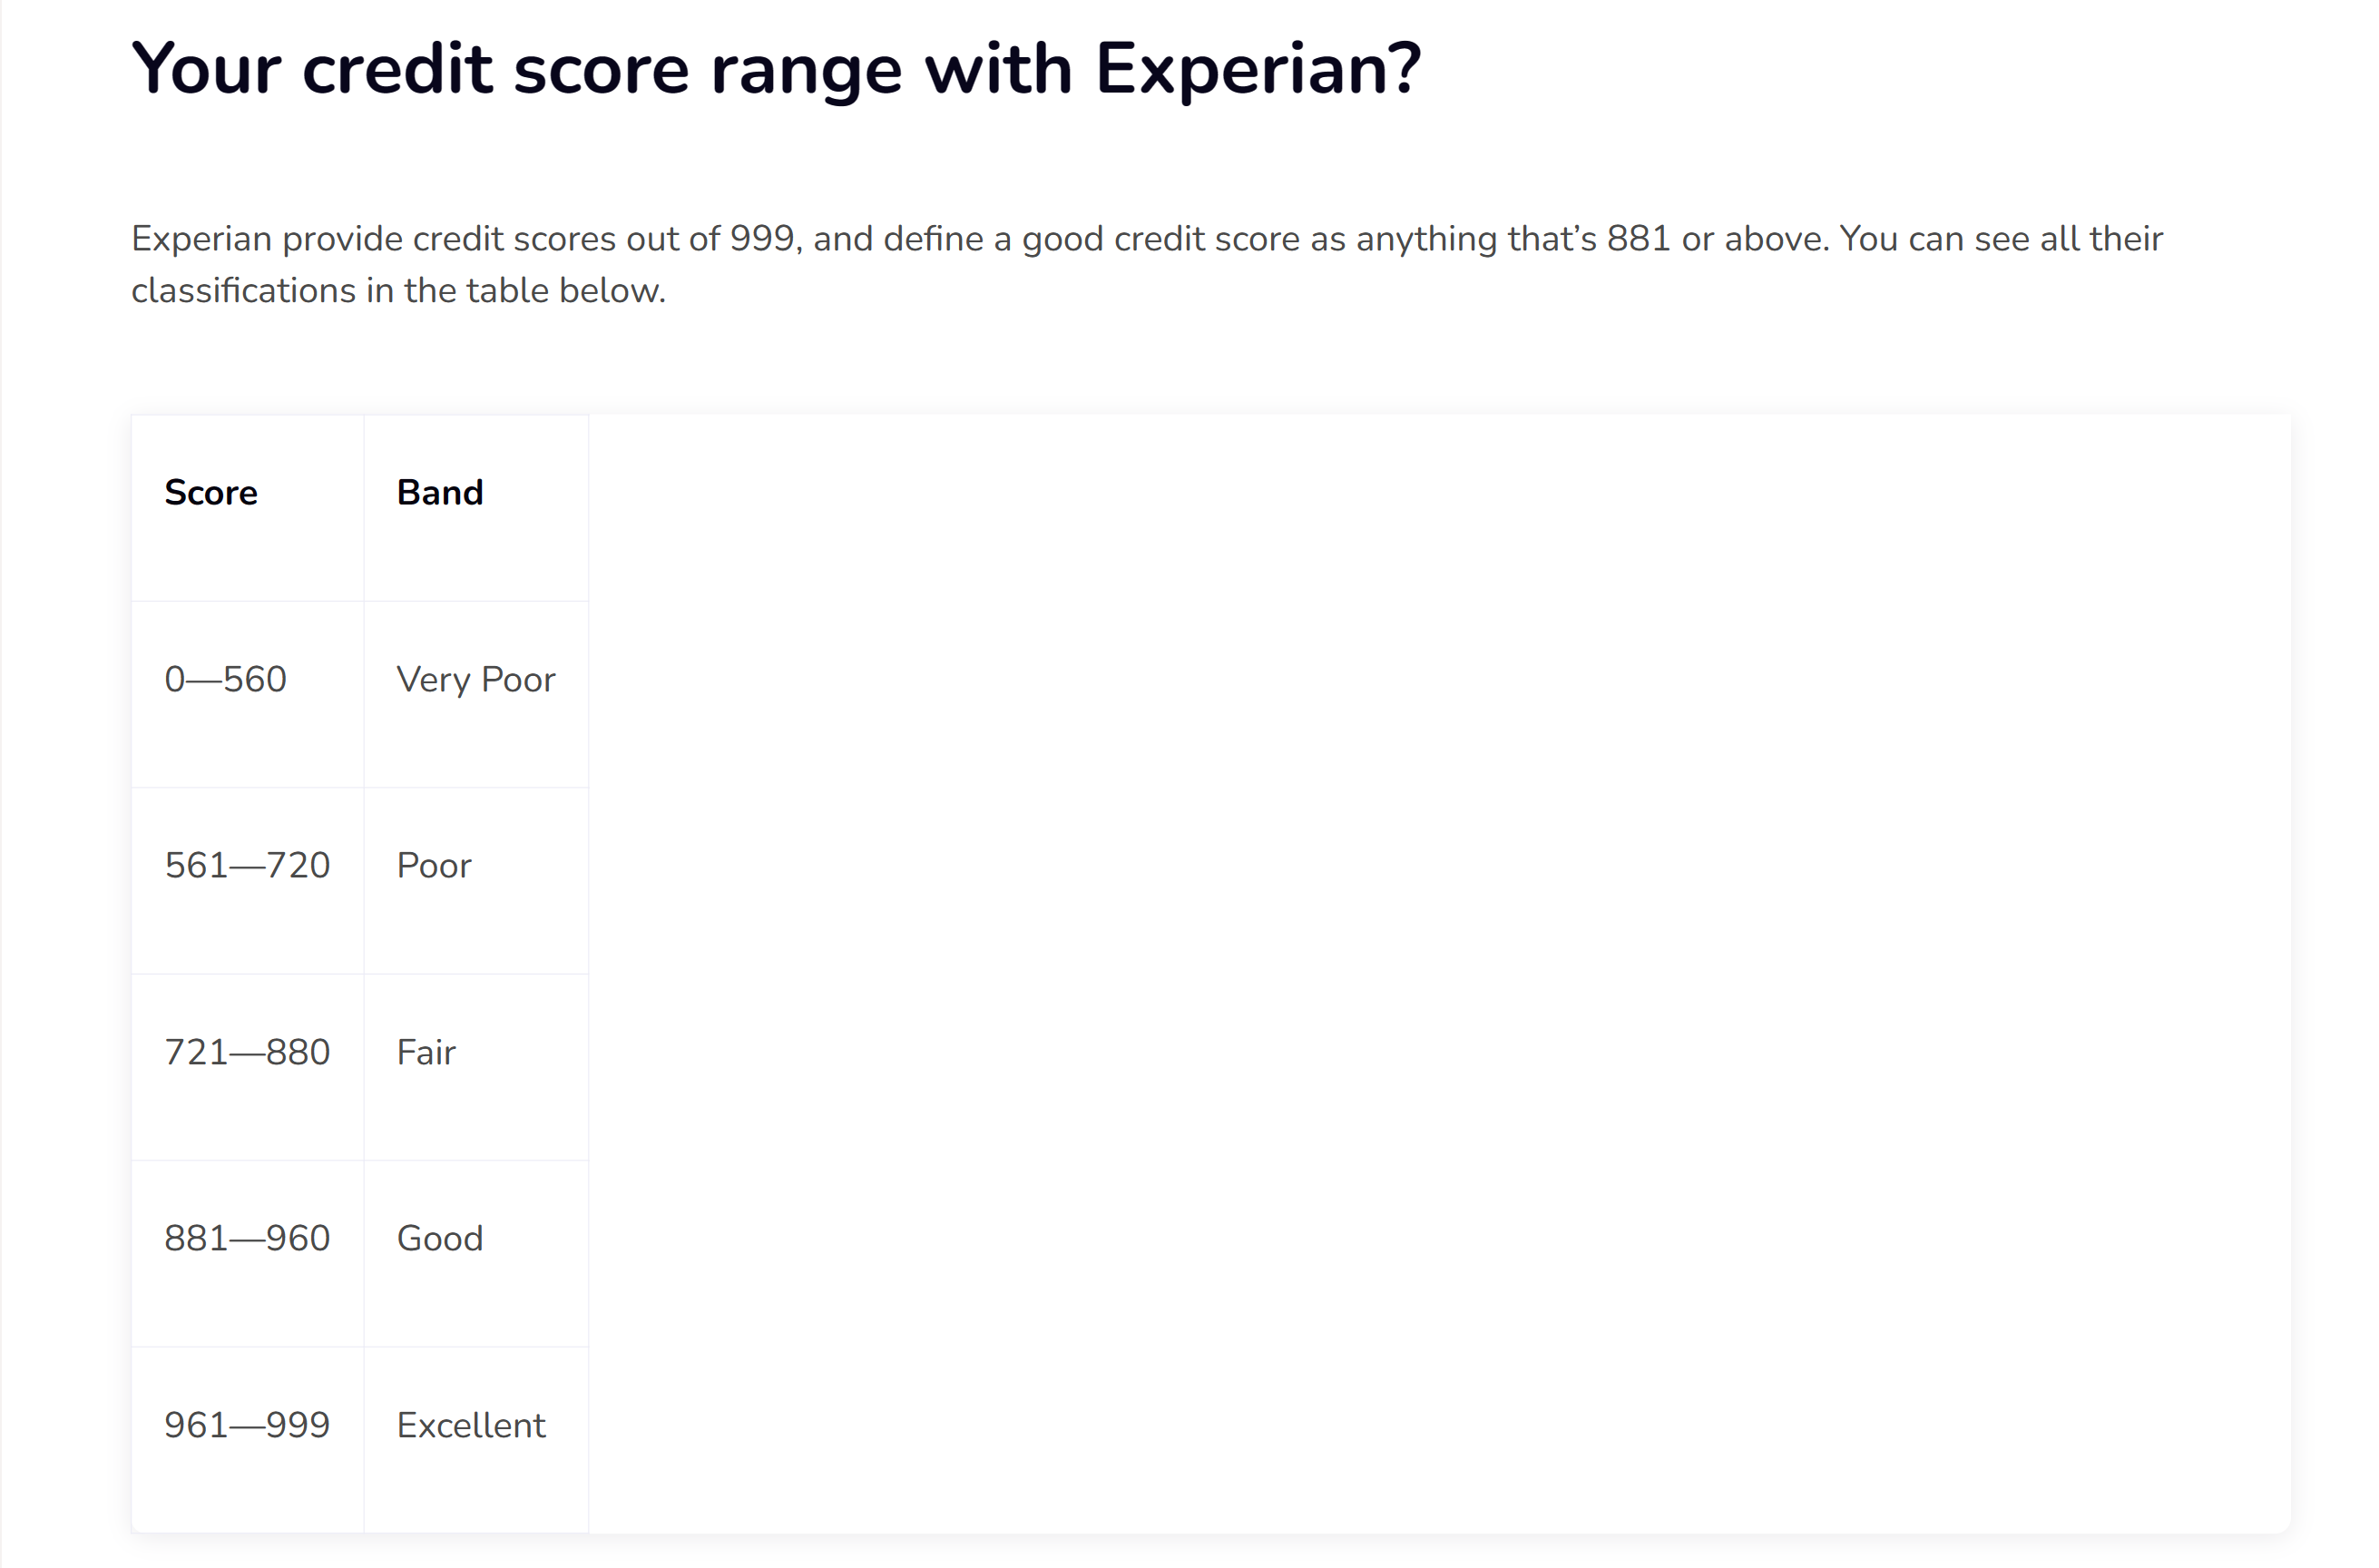

In [118]:
# Define the age bins and labels
bins = [-1, 560, 720, 880, 960,999]
labels = ['0-560', '561-720', '721-880', '881-960', '961-999']

# Categorize ages into the defined bins
dataset['credit_score_range'] = pd.cut(dataset['credit_score'], bins=bins, labels=labels, right=True)

In [119]:
dataset = dataset.drop('credit_score',axis=1)

In [120]:
dataset

area  gender marital_status          qualifications                                        occupation  on_benefits  home_ownership age_range num_children_range income_category credit_score_range
0                   Nottingham  Female        married   Level 3 (High school)                                     No occupation            1               0     28-38                  0          0-4999              0-560
1                     Rushmoor    Male        married          Apprenticeship          8. Process, plant and machine operatives            0               0     61-72                4-9     45000-49999              0-560
2                     Redditch    Male        married  Level 4 (BA+) or above  6. Caring, leisure and other service occupations            0               1     39-49                  1     45000-49999            881-960
3      Staffordshire Moorlands    Male  never_married  Level 4 (BA+) or above                         9. Elementary occupations            0               1     73-90                  0     45000-49999            721-880
4         Barking and Dagenham    Male        married        Level 1 (School)                                     No occupation            1               0     28-38                  0     10000-14999              0-560
...                        ...     ...            ...                     ...                                               ...          ...             ...       ...                ...             ...                ...
99995               Birmingham  Female  never_married   Level 3 (High school)                                     No occupation            1               0     17-27                  0          0-4999              0-560
99996                Runnymede  Female       divorced   Level 3 (High school)  6. Caring, leisure and other service occupations            0               1     50-60                  1     45000-49999            721-880
99997              Test Valley  Female        married   Level 3 (High school)     4. Administrative and secretarial occupations            0               1     73-90                  1     50000-54999            961-999
99998            County Durham  Female        married                   Other         7. Sales and customer service occupations            0               1     61-72                2-3     30000-34999            561-720
99999                  Norwich    Male        married        Level 2 (School)       1. Managers, directors and senior officials            0               1     61-72                  0     40000-44999            961-999

[100000 rows x 11 columns]

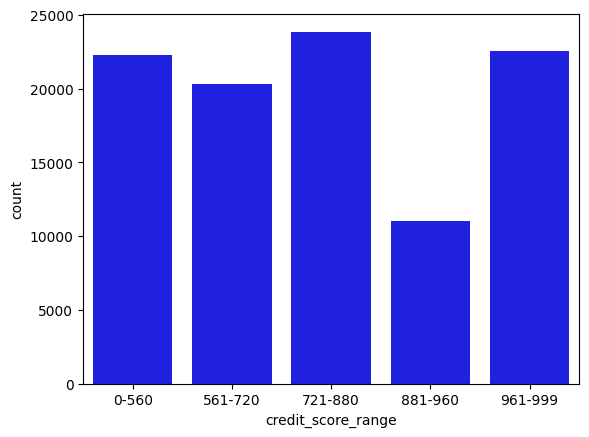

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(
    data=dataset,
    x='credit_score_range',
    y=None,  # Seaborn will count the occurrences automatically
    order=['0-560', '561-720', '721-880', '881-960', '961-999'],  
    color= 'blue'
)
plt.show()


Find equivalence classes after grouping the contennt of columns

In [122]:
def size_equivalence_classes_after(dataset : pd.DataFrame):
    # Select columns except "income", "credit_score", "on_benefits"
    quasies = dataset[[col for col in dataset.columns if col not in ["income_category", "credit_score_range", "on_benefits"]]]
    # Group by the selected columns and calculate the size of each group
    copyDataset = dataset.groupby(quasies.columns.tolist())
    
    # Print the resulting DataFrame
    # copyDataset
    
    # Return the 'Size' column
    return [len(g[1]) for g in copyDataset]
    

In [123]:
def size_equivalence_classes_diversity_after(dataset : pd.DataFrame):
    # Select columns except "income", "credit_score", "on_benefits"
    quasies = dataset[[col for col in dataset.columns ]]
    # Group by the selected columns and calculate the size of each group
    copyDataset = dataset.groupby(quasies.columns.tolist())
    
    # Print the resulting DataFrame
    # copyDataset
    
    # Return the 'Size' column
    return [len(g[1]) for g in copyDataset]
    

In [124]:
def to_be_removed_after(k: int,dataset: pd.DataFrame):
    
    result = []
       
    quasies = dataset[[col for col in dataset.columns if col not in ["income_category", "credit_score_range", "on_benefits"]]]
    print(quasies.columns.tolist())
    # Group by the selected columns and calculate the size of each group
    grouped = dataset.groupby(quasies.columns.tolist())
    
    for group in grouped:
        equivalence_class = group[1]
        if len(equivalence_class)<k:
            for row_index in equivalence_class.index:
                result.append(row_index)
                
    return result

In [125]:
def print_category_counts(df: pd.DataFrame):
    """
    Prints the feature, its categories, and the count of people in each category.
    """
    for column in df.columns:
        print(f"Feature: {column}")
        counts = df[column].value_counts()
        for category, count in counts.iteritems():
            print(f"  Category: {category}, Count: {count}")
        print("\n")



Delete records from Isel of Scily and City of London (only 15 records combined)

In [126]:
dataset = dataset[~dataset['area'].isin(['City of London', 'Isles of Scilly'])]

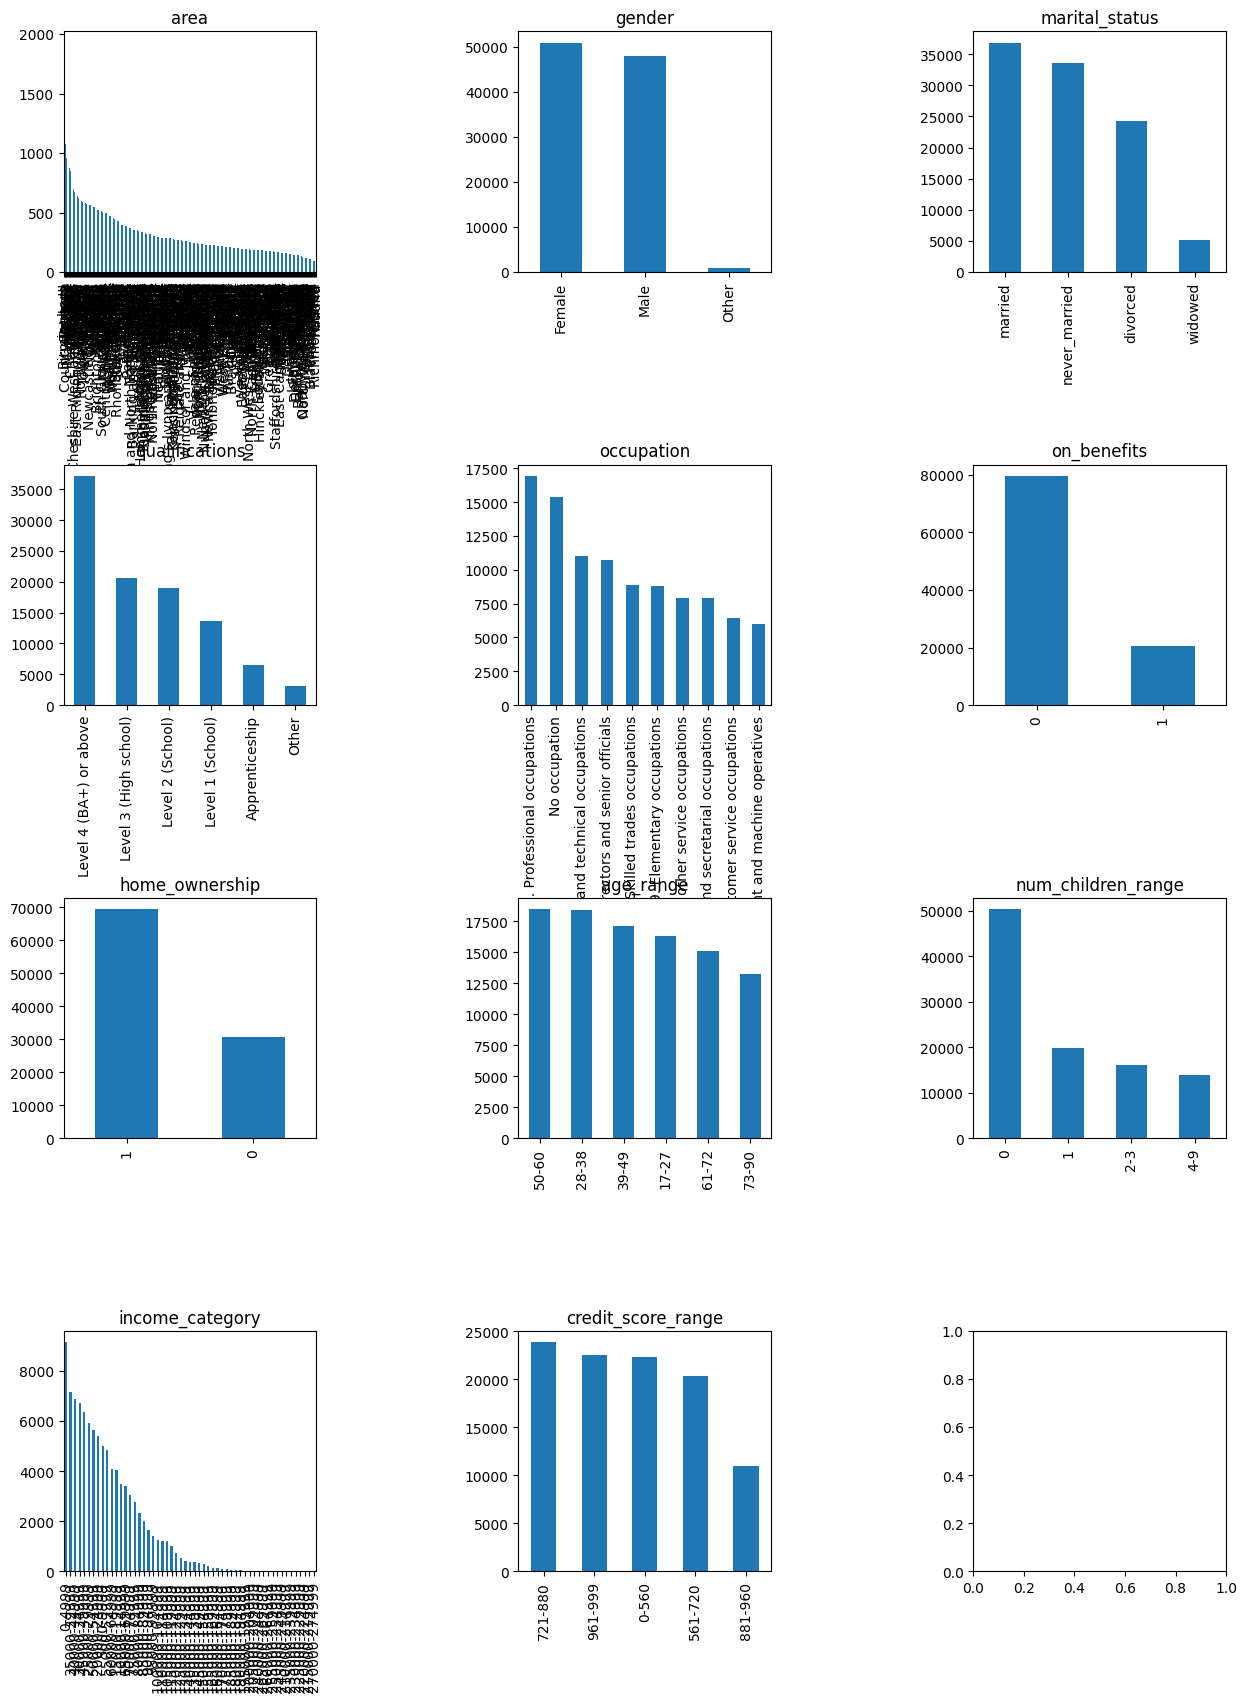

In [127]:
drawHist(dataset)

Group Apprenticeship and Other together

In [128]:
# Define a mapping function that groups 'other' and 'apprenticeship' together
def group_qualifications(qualification):
    if qualification in ['Other', 'Apprenticeship']:
        return 'Other_or_Apprenticeship'
    else:
        return qualification

# Apply the mapping function to the 'qualification' column
dataset['qualifications'] = dataset['qualifications'].apply(group_qualifications)

# Now the 'qualification' column will have 'other' and 'apprenticeship' grouped together


C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\121815798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['qualifications'] = dataset['qualifications'].apply(group_qualifications)


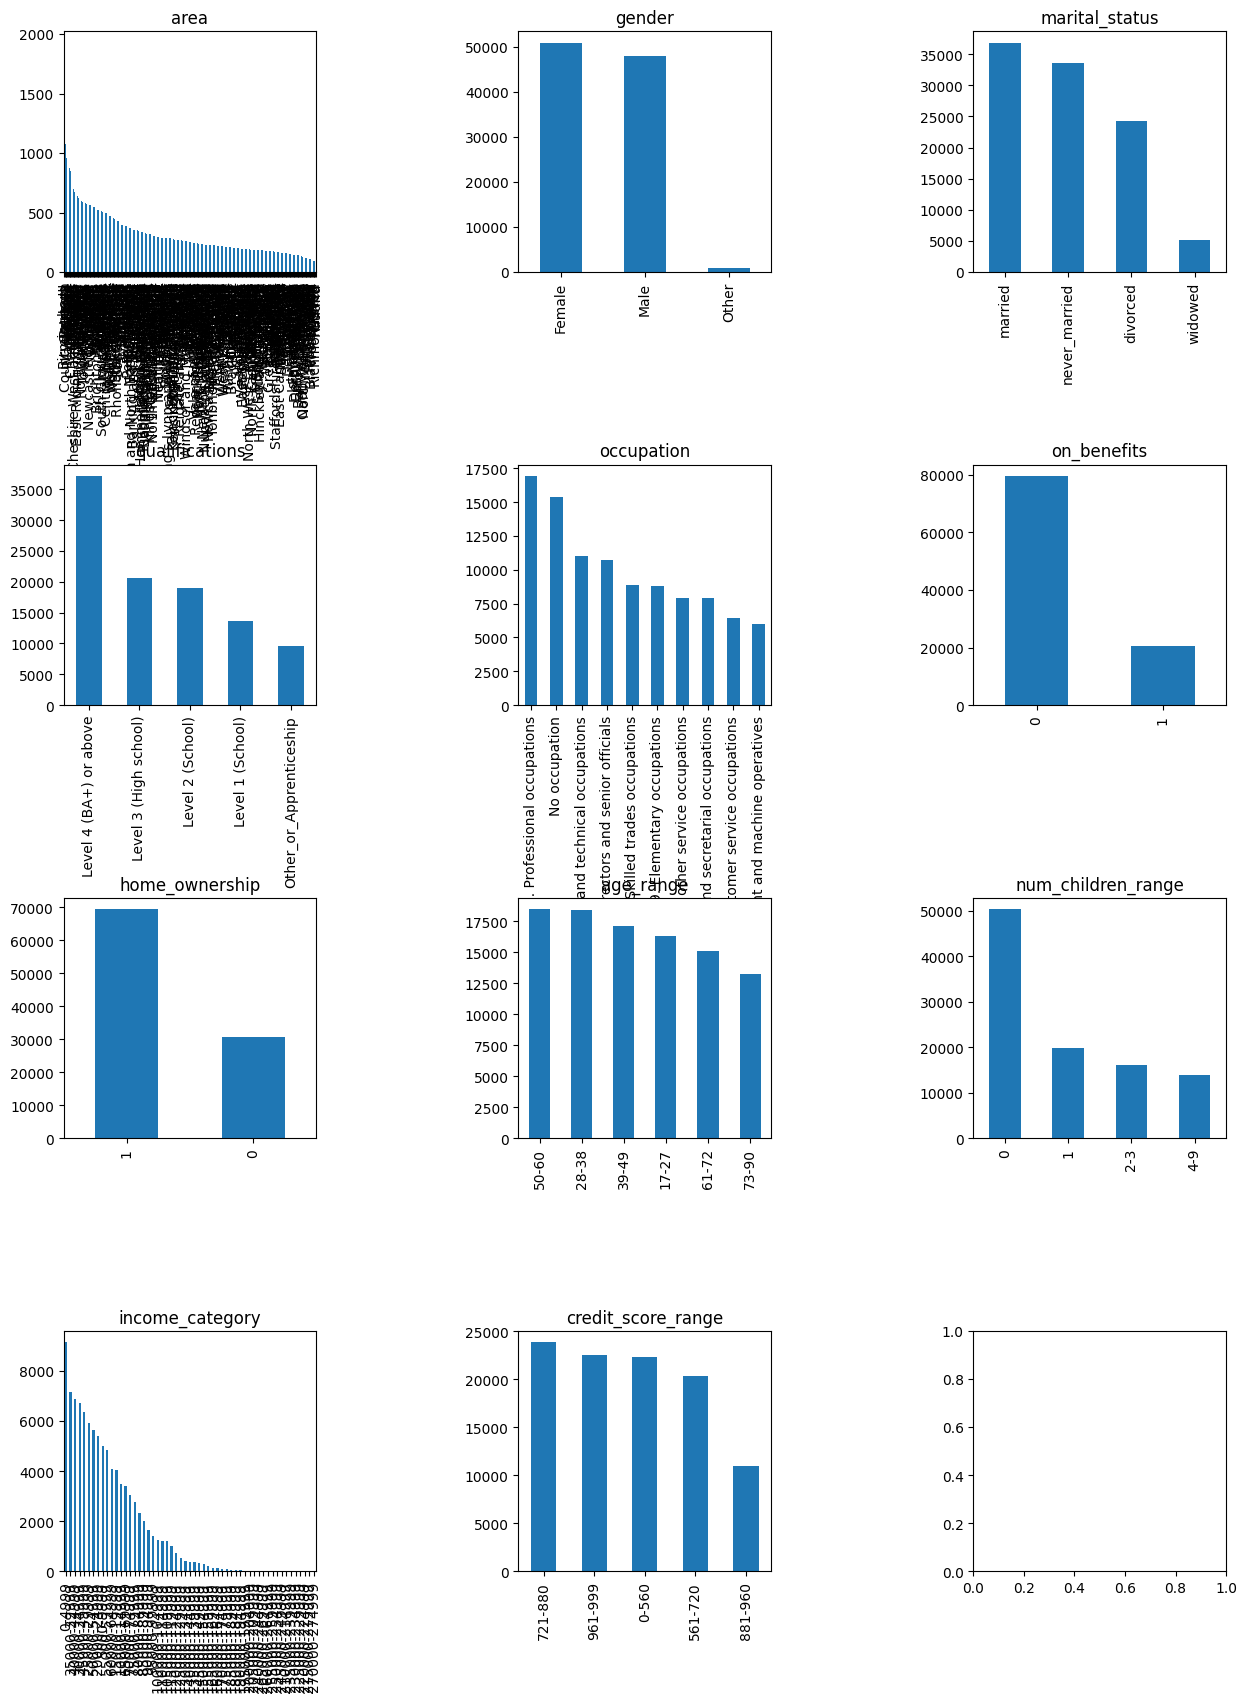

In [129]:
drawHist(dataset)

Group areas together using KMeans based on the ratios of their qualifications

In [130]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# One-hot encode the 'qualification' column
qualification_dummies = pd.get_dummies(dataset['qualifications'])
dataset_with_dummies = pd.concat([dataset['area'], qualification_dummies], axis=1)

# Calculate the ratio of each qualification category per area
qualification_ratios = dataset_with_dummies.groupby('area').mean()

# Since clustering algorithms can be sensitive to the scale of the data,
# standardize the features so that they're on the same scale
scaler = StandardScaler()
qualification_ratios_scaled = scaler.fit_transform(qualification_ratios)

k = 10 

kmeans = KMeans(n_clusters=k, random_state=0).fit(qualification_ratios_scaled)

# Assign cluster labels to each area
qualification_ratios['cluster_label'] = kmeans.labels_

# Create a dictionary mapping cluster labels to lists of areas
cluster_to_areas = qualification_ratios.reset_index().groupby('cluster_label')['area'].apply(list).to_dict()

# Create a new DataFrame mapping 'area' to 'cluster_label'
area_to_cluster_label = qualification_ratios.reset_index()[['area', 'cluster_label']]

# Merge this DataFrame with the original dataset to associate each area with a cluster label
dataset = dataset.merge(area_to_cluster_label, on='area', how='left')

# Define a function to map each area to its cluster's aggregate of areas
def map_cluster_to_aggregate_areas(cluster_label):
    return ','.join(cluster_to_areas[cluster_label])

# Apply the function to create a new column with the aggregate of areas for each cluster
dataset['cluster_area_aggregate'] = dataset['cluster_label'].apply(map_cluster_to_aggregate_areas)

# Now 'dataset' has a new column 'cluster_area_aggregate' with the aggregate areas of the cluster


C:\Users\styt-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Find the worst intra-cluster difference of all the clusters for the 5 qualification levels

k=316 (one cluster per area) = 0

k=158 0.0334947538337369 0.035437430786268015 0.03651156535771918 0.05286564359536483 0.027387241741004847

k=79 0.045206342539115846 0.06141906873614189 0.054770702021299716 0.0760225103004723 0.04100362044287277

k=40 0.07677616501145913 0.08080808080808081 0.07141880809185347 0.11301509587923292 0.04806683178707863

k=30 0.0792838874680307 0.0852084972462628 0.10015082956259427 0.1382779406972955 0.06797385620915034

k=20 0.09351432880844646 0.09471585244267197 0.10368823938761307 0.1335093896713615 0.058999253174010446

k=10 0.09706881903143587 0.12110726643598617 0.14328808446455504 0.18966391141609484 0.10202402501234162

In [131]:
def intra_cluster_diff_avg(lvL:list):
    curr_diff_lv=0
    for i in range(len(lvL)):
            for k in range(i+1,len(lvL)):
                curr_diff_lv+= abs(lvL[i]-lvL[k])
    return curr_diff_lv/(len(lvL) * (len(lvL) -1))

def intra_cluster_metrics(dataset: pd.DataFrame):

    Clusters = dataset.groupby(['cluster_label', 'area'])
    max_lvl1=-1
    max_lvl2=-1
    max_lvl3=-1
    max_lvl4=-1
    max_other=-1

    max_lvl1_avg=-1
    max_lvl2_avg=-1
    max_lvl3_avg=-1
    max_lvl4_avg=-1
    max_other_avg=-1

    previous = -1

    other = []
    lv1L = []
    lv2L = []
    lv3L = []
    lv4L = []

    for cluster_area,area in Clusters:

        if(cluster_area[0]!= previous and previous!=-1):
            
            max_lvl1 =max(max_lvl1, max(lv1L) - min(lv1L))
            max_lvl2 =max(max_lvl2, max(lv2L) - min(lv2L))
            max_lvl3 =max(max_lvl3, max(lv3L) - min(lv3L))
            max_lvl4 =max(max_lvl4, max(lv4L) - min(lv4L))
            max_other = max(max_other,max(other) - min(other))
            
            max_lvl1_avg=max(max_lvl1_avg,intra_cluster_diff_avg(lv1L) )
            max_lvl2_avg=max(max_lvl2_avg,intra_cluster_diff_avg(lv2L) )
            max_lvl3_avg=max(max_lvl3_avg,intra_cluster_diff_avg(lv3L) )
            max_lvl4_avg=max(max_lvl4_avg,intra_cluster_diff_avg(lv4L) )
            max_other_avg=max(max_other_avg,intra_cluster_diff_avg(other) )

            other = []
            lv1L = []
            lv2L = []
            lv3L = []
            lv4L = []

        
        sum = len(area)
        other.append(len(area[area['qualifications']=='Other_or_Apprenticeship']) / sum)
        lv1L.append( len(area[area['qualifications']=='Level 1 (School)']) / sum )
        lv2L.append(len(area[area['qualifications']=='Level 2 (School)']) / sum)
        lv3L.append(len(area[area['qualifications']=='Level 3 (High school)']) / sum)
        lv4L.append(len(area[area['qualifications']=='Level 4 (BA+) or above']) / sum)
        previous = cluster_area[0]


    print("Max intra-cluster-Difference of any 2 points:",max_lvl1,max_lvl2,max_lvl3,max_lvl4,max_other)      
    print("Max intra-cluster average of all points differences:",max_lvl1_avg,max_lvl2_avg,max_lvl3_avg,max_lvl4_avg, max_other_avg)     
intra_cluster_metrics(dataset)

Max intra-cluster-Difference of any 2 points: 0.08928571428571427 0.11118585732165207 0.12303113553113551 0.1470588235294118 0.07721109357866868
Max intra-cluster average of all points differences: 0.013757345733914286 0.01627748264834149 0.01581759191449661 0.023174472753325445 0.010744540788251036


In [132]:
dataset=dataset.drop(['area','cluster_label'],axis=1)

In [133]:
dataset = dataset.rename(columns={'cluster_area_aggregate':'area'})

In [134]:
eq_class=size_equivalence_classes_after(dataset)
print("Max: " , max(eq_class))
print("Min: " , min(eq_class))

print(len(to_be_removed_after(4,dataset)))


Max:  186
Min:  1
['gender', 'marital_status', 'qualifications', 'occupation', 'home_ownership', 'age_range', 'num_children_range', 'area']
54939


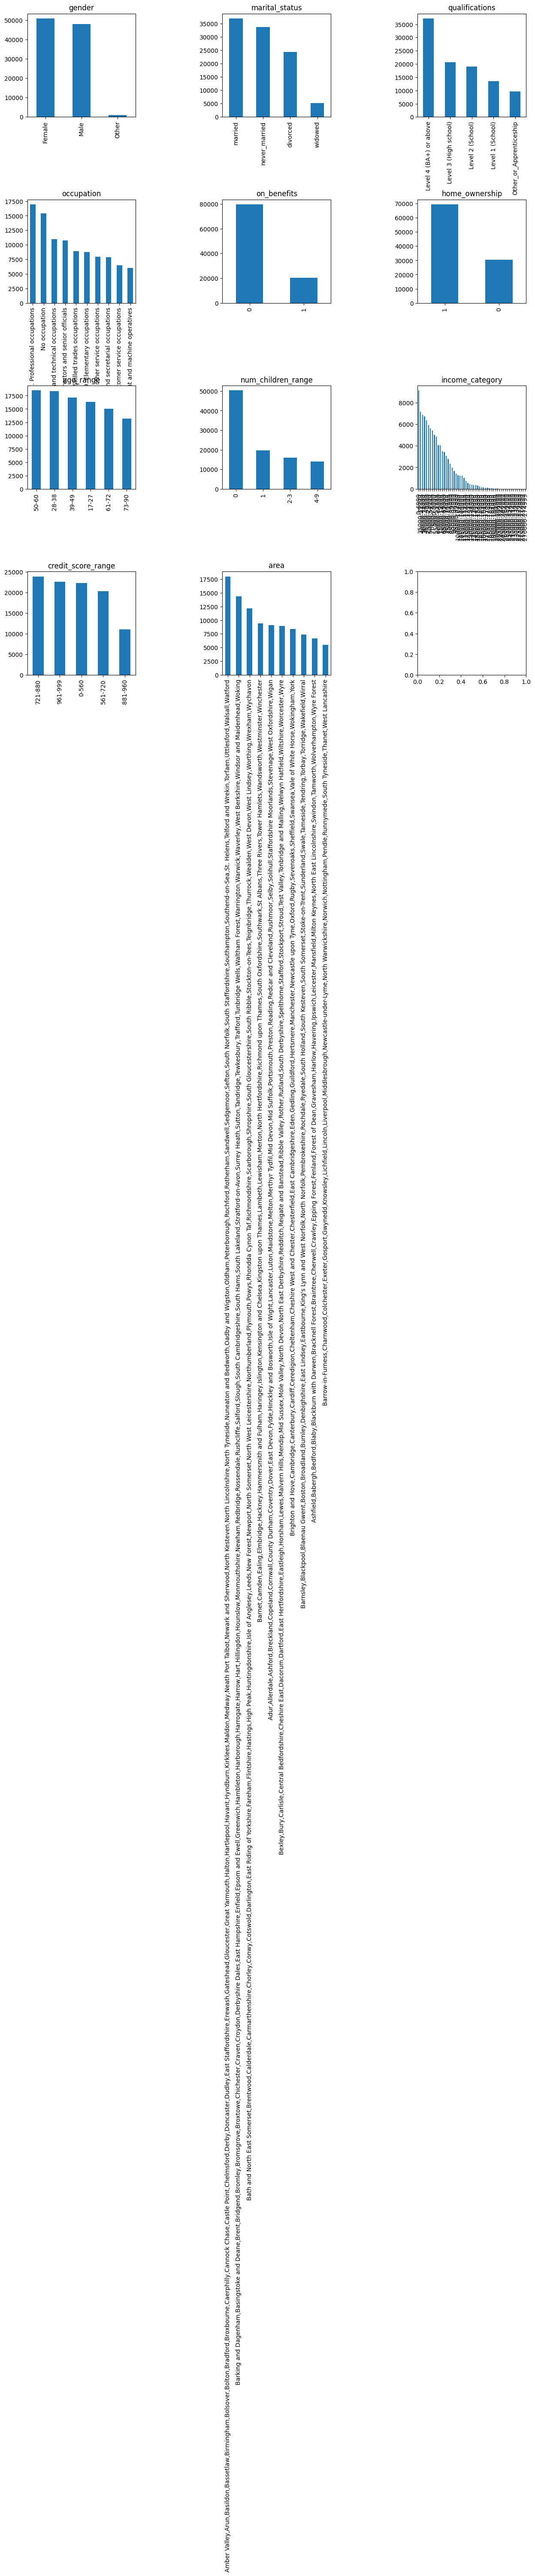

In [135]:
drawHist(dataset)

In [136]:
dataset

gender marital_status           qualifications                                        occupation  on_benefits  home_ownership age_range num_children_range income_category credit_score_range                                               area
0      Female        married    Level 3 (High school)                                     No occupation            1               0     28-38                  0          0-4999              0-560  Barrow-in-Furness,Charnwood,Colchester,Exeter,...
1        Male        married  Other_or_Apprenticeship          8. Process, plant and machine operatives            0               0     61-72                4-9     45000-49999              0-560  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
2        Male        married   Level 4 (BA+) or above  6. Caring, leisure and other service occupations            0               1     39-49                  1     45000-49999            881-960  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...
3        Male  never_married   Level 4 (BA+) or above                         9. Elementary occupations            0               1     73-90                  0     45000-49999            721-880  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
4        Male        married         Level 1 (School)                                     No occupation            1               0     28-38                  0     10000-14999              0-560  Barking and Dagenham,Basingstoke and Deane,Bre...
...       ...            ...                      ...                                               ...          ...             ...       ...                ...             ...                ...                                                ...
99980  Female  never_married    Level 3 (High school)                                     No occupation            1               0     17-27                  0          0-4999              0-560  Amber Valley,Arun,Basildon,Bassetlaw,Birmingha...
99981  Female       divorced    Level 3 (High school)  6. Caring, leisure and other service occupations            0               1     50-60                  1     45000-49999            721-880  Barrow-in-Furness,Charnwood,Colchester,Exeter,...
99982  Female        married    Level 3 (High school)     4. Administrative and secretarial occupations            0               1     73-90                  1     50000-54999            961-999  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...
99983  Female        married  Other_or_Apprenticeship         7. Sales and customer service occupations            0               1     61-72                2-3     30000-34999            561-720  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
99984    Male        married         Level 2 (School)       1. Managers, directors and senior officials            0               1     61-72                  0     40000-44999            961-999  Barrow-in-Furness,Charnwood,Colchester,Exeter,...

[99985 rows x 11 columns]

In [137]:
worst_column,size=least_impact_on_k_anonymity(dataset)
print(f"The column with the least impact on k-anonymity is '{worst_column}' with a smallest group size of {size}.")


The column with the least impact on k-anonymity is 'gender' with a smallest group size of 1004.


find correlation of all rows and columns but for column marital=dicorced with Credit-score (task 3)

same but marital = never_married

sane but marital=never_married


https://www.experian.com/blogs/ask-experian/credit-education/life-events/marriage-and-credit/


In [138]:
def chi2_analysis(dataset_:pd.DataFrame):
    cramers_v_values = {}
    for column in dataset_.columns:
        if column != 'credit_score_range':  # Exclude the 'credit_score' column itself
            # Create a contingency table
            contingency_table = pd.crosstab(dataset_[column], dataset_['credit_score_range'])
            chi2, p, dof, _ = chi2_contingency(contingency_table)
            # Calculate Cramér's V
            n = contingency_table.sum().sum()
            cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
            cramers_v_values[column] = cramers_v

    return cramers_v_values

dataset_find_corr= dataset.copy(deep=True)
# Initialize a dictionary to store Cramér's V values
dataset_divorced=dataset_find_corr[dataset_find_corr["marital_status"]=="divorced"]
dataset_divorced.drop("marital_status",axis=1,inplace=True)

print("Divorced:", chi2_analysis(dataset_divorced))

dataset_married=dataset_find_corr[dataset_find_corr["marital_status"]=="married"]
dataset_married.drop("marital_status",axis=1,inplace=True)
print("Married:", chi2_analysis(dataset_married))

dataset_never_married=dataset_find_corr[dataset_find_corr["marital_status"]=="never_married"]
dataset_never_married.drop("marital_status",axis=1,inplace=True)

print("never married:", chi2_analysis(dataset_never_married))

dataset_widowed=dataset_find_corr[dataset_find_corr["marital_status"]=="widowed"]
dataset_widowed.drop("marital_status",axis=1,inplace=True)

print("Widoed:", chi2_analysis(dataset_widowed))



Divorced: {'gender': 0.011255104245589639, 'qualifications': 0.1613430844212504, 'occupation': 0.22288070663994147, 'on_benefits': 0.4834169687358357, 'home_ownership': 0.49652835434020454, 'age_range': 0.021531944300489655, 'num_children_range': 0.009478990396558426, 'income_category': 0.3106814748518306, 'area': 0.06815848874727806}


C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\4017407585.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_divorced.drop("marital_status",axis=1,inplace=True)
C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\4017407585.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_married.drop("marital_status",axis=1,inplace=True)


Married: {'gender': 0.00812124783875226, 'qualifications': 0.15842060252756232, 'occupation': 0.2237201242036744, 'on_benefits': 0.4831679095584817, 'home_ownership': 0.503902154533923, 'age_range': 0.043720347717805974, 'num_children_range': 0.012445265557201126, 'income_category': 0.3098185911158789, 'area': 0.07116088106112407}
never married: {'gender': 0.01329360778672285, 'qualifications': 0.19940469521193663, 'occupation': 0.2684822359614924, 'on_benefits': 0.5376017747147354, 'home_ownership': 0.5549190284600012, 'age_range': 0.09564277564514576, 'num_children_range': 0.015122781142970219, 'income_category': 0.3286745017299797, 'area': 0.06539969374337079}


C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\4017407585.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_never_married.drop("marital_status",axis=1,inplace=True)
C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\4017407585.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_widowed.drop("marital_status",axis=1,inplace=True)


Widoed: {'gender': 0.020566822072560983, 'qualifications': 0.15668377672172754, 'occupation': 0.22349698262176534, 'on_benefits': 0.46358478449324786, 'home_ownership': 0.4933755954399604, 'age_range': 0.037707243511221636, 'num_children_range': 0.030019822520340612, 'income_category': 0.3198710911468251, 'area': 0.06916738413499328}


In [139]:
dataset = dataset.drop('marital_status',axis=1)

In [140]:
eq_class=size_equivalence_classes_after(dataset)
print("Max: " , max(eq_class))
print("Min: " , min(eq_class))

print(len(to_be_removed_after(4,dataset)))


Max:  214
Min:  1
['gender', 'qualifications', 'occupation', 'home_ownership', 'age_range', 'num_children_range', 'area']
28040


In [141]:
dataset

gender           qualifications                                        occupation  on_benefits  home_ownership age_range num_children_range income_category credit_score_range                                               area
0      Female    Level 3 (High school)                                     No occupation            1               0     28-38                  0          0-4999              0-560  Barrow-in-Furness,Charnwood,Colchester,Exeter,...
1        Male  Other_or_Apprenticeship          8. Process, plant and machine operatives            0               0     61-72                4-9     45000-49999              0-560  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
2        Male   Level 4 (BA+) or above  6. Caring, leisure and other service occupations            0               1     39-49                  1     45000-49999            881-960  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...
3        Male   Level 4 (BA+) or above                         9. Elementary occupations            0               1     73-90                  0     45000-49999            721-880  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
4        Male         Level 1 (School)                                     No occupation            1               0     28-38                  0     10000-14999              0-560  Barking and Dagenham,Basingstoke and Deane,Bre...
...       ...                      ...                                               ...          ...             ...       ...                ...             ...                ...                                                ...
99980  Female    Level 3 (High school)                                     No occupation            1               0     17-27                  0          0-4999              0-560  Amber Valley,Arun,Basildon,Bassetlaw,Birmingha...
99981  Female    Level 3 (High school)  6. Caring, leisure and other service occupations            0               1     50-60                  1     45000-49999            721-880  Barrow-in-Furness,Charnwood,Colchester,Exeter,...
99982  Female    Level 3 (High school)     4. Administrative and secretarial occupations            0               1     73-90                  1     50000-54999            961-999  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...
99983  Female  Other_or_Apprenticeship         7. Sales and customer service occupations            0               1     61-72                2-3     30000-34999            561-720  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
99984    Male         Level 2 (School)       1. Managers, directors and senior officials            0               1     61-72                  0     40000-44999            961-999  Barrow-in-Furness,Charnwood,Colchester,Exeter,...

[99985 rows x 10 columns]

Chi-Squared for occupation and qualification

In [142]:
marital_status_encoded = pd.get_dummies(dataset['occupation'])
credit_score_encoded = pd.get_dummies(dataset['qualifications'])

# Preparing to calculate Cramér's V
from itertools import product

# Initialize a DataFrame to store Cramér's V values
cramers_v_df = pd.DataFrame(index=marital_status_encoded.columns, columns=credit_score_encoded.columns)

# Step 2: Calculating Cramér's V for each combination of encoded categories
for marital_status_col, credit_score_col in product(marital_status_encoded.columns, credit_score_encoded.columns):
    contingency_table = pd.crosstab(marital_status_encoded[marital_status_col], credit_score_encoded[credit_score_col])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    cramers_v_df.loc[marital_status_col, credit_score_col] = cramers_v

cramers_v_df

Level 1 (School) Level 2 (School) Level 3 (High school) Level 4 (BA+) or above Other_or_Apprenticeship
1. Managers, directors and senior officials                0.018475         0.024971                   0.0               0.030359                0.004957
2. Professional occupations                                0.027305         0.024326              0.002777                 0.0399                0.005071
3. Associate professional and technical occupat...         0.020517         0.021962              0.001061               0.030268                 0.00496
4. Administrative and secretarial occupations              0.012279         0.020383              0.003806                0.02072                 0.00214
5. Skilled trades occupations                              0.007118         0.012039              0.010113               0.001993                0.007082
6. Caring, leisure and other service occupations           0.012228         0.016911               0.01238               0.012708                 0.00105
7. Sales and customer service occupations                  0.007483         0.010309              0.009814               0.002114                0.005408
8. Process, plant and machine operatives                   0.005419         0.004487              0.002934               0.001446                0.013994
9. Elementary occupations                                  0.009997         0.014639              0.001207               0.010763                0.011735
No occupation                                                0.1028         0.124882              0.027841               0.131395                 0.03198

Histograms

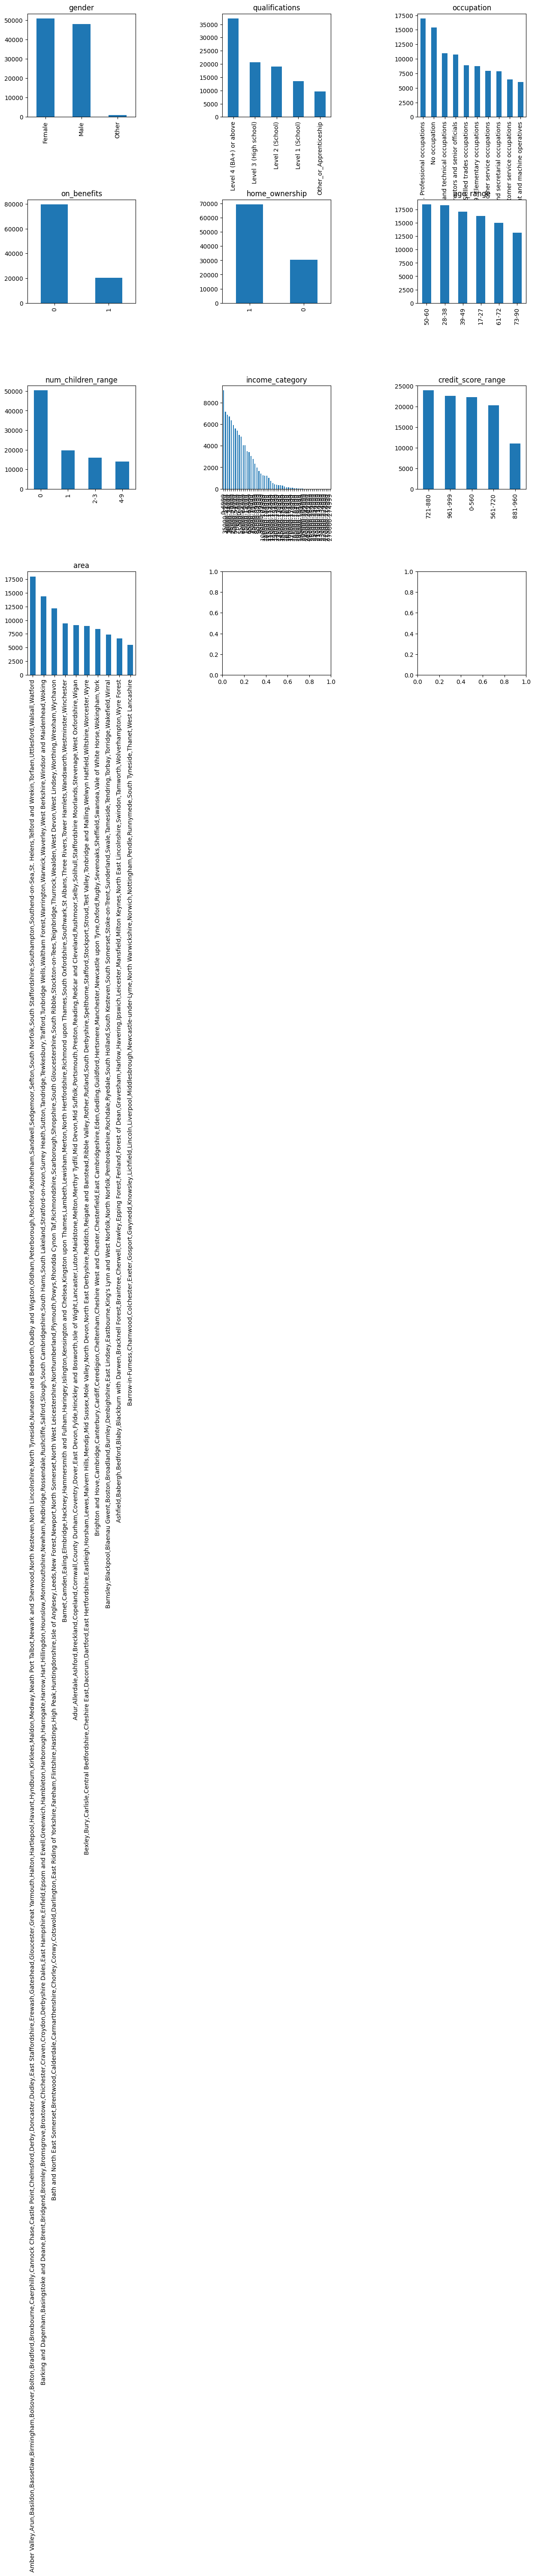

In [143]:
drawHist(dataset)

Group together level 1 and level 2 school together

In [144]:
# Define a mapping function that groups 'Level 1' and 'Level 2' together
def group_education(education):
    if education in ['Level 1 (School)', 'Level 2 (School)']:
        return 'School'
    else:
        return education

# Apply the mapping function to the 'qualification' column
dataset['qualifications'] = dataset['qualifications'].apply(group_education)



In [145]:
dataset

gender           qualifications                                        occupation  on_benefits  home_ownership age_range num_children_range income_category credit_score_range                                               area
0      Female    Level 3 (High school)                                     No occupation            1               0     28-38                  0          0-4999              0-560  Barrow-in-Furness,Charnwood,Colchester,Exeter,...
1        Male  Other_or_Apprenticeship          8. Process, plant and machine operatives            0               0     61-72                4-9     45000-49999              0-560  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
2        Male   Level 4 (BA+) or above  6. Caring, leisure and other service occupations            0               1     39-49                  1     45000-49999            881-960  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...
3        Male   Level 4 (BA+) or above                         9. Elementary occupations            0               1     73-90                  0     45000-49999            721-880  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
4        Male                   School                                     No occupation            1               0     28-38                  0     10000-14999              0-560  Barking and Dagenham,Basingstoke and Deane,Bre...
...       ...                      ...                                               ...          ...             ...       ...                ...             ...                ...                                                ...
99980  Female    Level 3 (High school)                                     No occupation            1               0     17-27                  0          0-4999              0-560  Amber Valley,Arun,Basildon,Bassetlaw,Birmingha...
99981  Female    Level 3 (High school)  6. Caring, leisure and other service occupations            0               1     50-60                  1     45000-49999            721-880  Barrow-in-Furness,Charnwood,Colchester,Exeter,...
99982  Female    Level 3 (High school)     4. Administrative and secretarial occupations            0               1     73-90                  1     50000-54999            961-999  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...
99983  Female  Other_or_Apprenticeship         7. Sales and customer service occupations            0               1     61-72                2-3     30000-34999            561-720  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
99984    Male                   School       1. Managers, directors and senior officials            0               1     61-72                  0     40000-44999            961-999  Barrow-in-Furness,Charnwood,Colchester,Exeter,...

[99985 rows x 10 columns]

In [146]:
eq_class=size_equivalence_classes_after(dataset)
print("Max: " , max(eq_class))
print("Min: " , min(eq_class))

print(len(to_be_removed_after(4,dataset)))


Max:  352
Min:  1
['gender', 'qualifications', 'occupation', 'home_ownership', 'age_range', 'num_children_range', 'area']
22161


Correlation of occupation and income categories

In [147]:
# Assuming your DataFrame is named your_dataframe
# Replace 'your_dataframe' with the actual name of your DataFrame

marital_status_encoded = pd.get_dummies(dataset['occupation'])
credit_score_encoded = pd.get_dummies(dataset['income_category'])

# Preparing to calculate Cramér's V
from itertools import product

# Initialize a DataFrame to store Cramér's V values
cramers_v_df = pd.DataFrame(index=marital_status_encoded.columns, columns=credit_score_encoded.columns)

# Step 2: Calculating Cramér's V for each combination of encoded categories
for marital_status_col, credit_score_col in product(marital_status_encoded.columns, credit_score_encoded.columns):
    contingency_table = pd.crosstab(marital_status_encoded[marital_status_col], credit_score_encoded[credit_score_col])
    chi2, p, dof, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    cramers_v_df.loc[marital_status_col, credit_score_col] = cramers_v

cramers_v_df

C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\3608420903.py:18: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\3608420903.py:18: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\3608420903.py:18: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\3608420903.py:18: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
C:\Users\styt-\AppData\Local\Temp\ipykernel_18096\3608420903.py:18: RuntimeWarning: invalid value encountered in divide
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
C:\Users\styt-\AppData\Local\Temp\ipykernel_1

0-4999 5000-9999 10000-14999 15000-19999 20000-24999 25000-29999 30000-34999 35000-39999 40000-44999 45000-49999 50000-54999 55000-59999 60000-64999 65000-69999 70000-74999 75000-79999 80000-84999 85000-89999 90000-94999 95000-99999 100000-104999 105000-109999 110000-114999 115000-119999 120000-124999 125000-129999 130000-134999 135000-139999 140000-144999 145000-149999 150000-154999 155000-159999 160000-164999 165000-169999 170000-174999 175000-179999 180000-184999 185000-189999 190000-194999 195000-199999 200000-204999 205000-209999 210000-214999 215000-219999 220000-224999 225000-229999 230000-234999 235000-239999 240000-244999 245000-249999 250000-254999 255000-259999 260000-264999 265000-269999 270000-274999
1. Managers, directors and senior officials         0.109908  0.079581    0.065815    0.071189    0.082787     0.08422    0.080209    0.058643    0.034674    0.018625    0.018707    0.017724    0.014067    0.001736    0.017581    0.038543    0.037235    0.053658    0.083536    0.096322      0.114408      0.117316      0.116543      0.120136      0.113372      0.097588      0.106668      0.102085      0.121884      0.131301      0.142318       0.13346      0.107172      0.109482      0.090741      0.088415      0.074057      0.074617      0.056888       0.03965      0.030122      0.009286           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN
2. Professional occupations                         0.143136  0.103656    0.085739     0.08773    0.084353    0.050008    0.024167    0.017052    0.024441    0.035653     0.00906    0.018203    0.037645    0.052522    0.089425    0.107503    0.119944    0.104772    0.086492    0.074006      0.079289      0.092495      0.099335      0.083181      0.065296      0.058922      0.035128      0.031081      0.016033      0.004007      0.013254      0.020197      0.016488      0.016856      0.013864      0.013491      0.011176      0.011267      0.008365      0.005443      0.003729           0.0           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN
3. Associate professional and technical occupat...  0.111424  0.080533    0.060973    0.043318    0.006715    0.012441    0.006358    0.017473    0.004523    0.012227    0.028667    0.052885    0.066711    0.083725    0.052989    0.039822    0.044617    0.053249    0.042516    0.039545      0.007831      0.011432      0.017442      0.019889      0.023072      0.024146      0.021013      0.020834      0.021072       0.02029      0.018695       0.01605      0.012687      0.012976      0.010617      0.010322      0.008485      0.008557      0.006233      0.003842      0.002392           0.0           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN
4. Administrative and secretarial occupations       0.092471   0.06373     0.03245    0.011454    0.030134    0.027228     0.01153    0.011348    0.028323    0.049465    0.059858    0.056351    0.032267    0.019316    0.012478    0.010491    0.005427    0.016689    0.023062    0.024711       0.02864      0.032147      0.032229      0.029491      0.024788      0.021125      0.018648      0.017254      0.017453      0.016799      0.015464      0.013247      0.010419      0.010663      0.008671      0.008421       0.00686      0.006921      0.004926      0.002827      0.001512           0.0           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN           NaN
5. Skilled trades occupations                       0.098821  0.068251    0.026847     0.01187    0.054107    0.032067    0.022473    0.029545    0.030536    0.058058   

In [148]:
dataset

gender           qualifications                                        occupation  on_benefits  home_ownership age_range num_children_range income_category credit_score_range                                               area
0      Female    Level 3 (High school)                                     No occupation            1               0     28-38                  0          0-4999              0-560  Barrow-in-Furness,Charnwood,Colchester,Exeter,...
1        Male  Other_or_Apprenticeship          8. Process, plant and machine operatives            0               0     61-72                4-9     45000-49999              0-560  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
2        Male   Level 4 (BA+) or above  6. Caring, leisure and other service occupations            0               1     39-49                  1     45000-49999            881-960  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...
3        Male   Level 4 (BA+) or above                         9. Elementary occupations            0               1     73-90                  0     45000-49999            721-880  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
4        Male                   School                                     No occupation            1               0     28-38                  0     10000-14999              0-560  Barking and Dagenham,Basingstoke and Deane,Bre...
...       ...                      ...                                               ...          ...             ...       ...                ...             ...                ...                                                ...
99980  Female    Level 3 (High school)                                     No occupation            1               0     17-27                  0          0-4999              0-560  Amber Valley,Arun,Basildon,Bassetlaw,Birmingha...
99981  Female    Level 3 (High school)  6. Caring, leisure and other service occupations            0               1     50-60                  1     45000-49999            721-880  Barrow-in-Furness,Charnwood,Colchester,Exeter,...
99982  Female    Level 3 (High school)     4. Administrative and secretarial occupations            0               1     73-90                  1     50000-54999            961-999  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...
99983  Female  Other_or_Apprenticeship         7. Sales and customer service occupations            0               1     61-72                2-3     30000-34999            561-720  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...
99984    Male                   School       1. Managers, directors and senior officials            0               1     61-72                  0     40000-44999            961-999  Barrow-in-Furness,Charnwood,Colchester,Exeter,...

[99985 rows x 10 columns]

Cluster-group occupations together

In [149]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming you've loaded your dataset into a DataFrame named 'dataset'
# dataset = pd.read_csv('your_data.csv')

# One-hot encode the 'qualification' column
income_dummies = pd.get_dummies(dataset['income_category'])
dataset_with_dummies = pd.concat([dataset['occupation'], income_dummies], axis=1)

# Calculate the ratio of each qualification category per area
qualification_ratios = dataset_with_dummies.groupby('occupation').mean()

# Since clustering algorithms can be sensitive to the scale of the data,
# standardize the features so that they're on the same scale
scaler = StandardScaler()
qualification_ratios_scaled = scaler.fit_transform(qualification_ratios)

# Determine the number of clusters (may require domain knowledge or additional analysis)
k = 3  # Example number of clusters

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(qualification_ratios_scaled)

# Assign cluster labels to each area
qualification_ratios['cluster_label'] = kmeans.labels_

# Create a dictionary mapping cluster labels to lists of areas
cluster_to_areas = qualification_ratios.reset_index().groupby('cluster_label')['occupation'].apply(list).to_dict()

# Create a new DataFrame mapping 'area' to 'cluster_label'
area_to_cluster_label = qualification_ratios.reset_index()[['occupation', 'cluster_label']]

# Merge this DataFrame with the original dataset to associate each area with a cluster label
dataset = dataset.merge(area_to_cluster_label, on='occupation', how='left')

# Define a function to map each area to its cluster's aggregate of areas
def map_cluster_to_aggregate_areas(cluster_label):
    return ','.join(cluster_to_areas[cluster_label])

# Apply the function to create a new column with the aggregate of areas for each cluster
dataset['cluster_occupation_aggregate'] = dataset['cluster_label'].apply(map_cluster_to_aggregate_areas)

# Now 'dataset' has a new column 'cluster_area_aggregate' with the aggregate areas of the cluster


C:\Users\styt-\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [150]:
def intra_cluster_diff_avg(values):
    curr_diff = 0
    n = len(values)
    for i in range(n):
        for k in range(i + 1, n):
            curr_diff += abs(values[i] - values[k])
    return curr_diff / (n * (n - 1)) if n > 1 else 0

def intra_cluster_metrics(dataset: pd.DataFrame):
    Clusters = dataset.groupby(['cluster_label', 'occupation'])

    max_diff = {}
    max_diff_avg = {}
    category_values = {}
    previous_cluster = -1

    largest_max_diff = ("", -1)
    largest_avg_diff = ("", -1)

    for (cluster_label, _), occupation_group in Clusters:
        if cluster_label != previous_cluster and previous_cluster != -1:
            for category, values in category_values.items():
                max_range = max(values) - min(values)
                avg_range = intra_cluster_diff_avg(values)

                max_diff[category] = max(max_diff.get(category, -1), max_range)
                max_diff_avg[category] = max(max_diff_avg.get(category, -1), avg_range)

                if max_diff[category] > largest_max_diff[1]:
                    largest_max_diff = (category, max_diff[category])

                if max_diff_avg[category] > largest_avg_diff[1]:
                    largest_avg_diff = (category, max_diff_avg[category])

            category_values.clear()

        sum_occ = len(occupation_group)
        for category in occupation_group['income_category'].unique():
            proportion = len(occupation_group[occupation_group['income_category'] == category]) / sum_occ
            category_values.setdefault(category, []).append(proportion)

        previous_cluster = cluster_label

    # Handle the last cluster
    for category, values in category_values.items():
        max_range = max(values) - min(values)
        avg_range = intra_cluster_diff_avg(values)

        max_diff[category] = max(max_diff.get(category, -1), max_range)
        max_diff_avg[category] = max(max_diff_avg.get(category, -1), avg_range)

        if max_diff[category] > largest_max_diff[1]:
            largest_max_diff = (category, max_diff[category])

        if max_diff_avg[category] > largest_avg_diff[1]:
            largest_avg_diff = (category, max_diff_avg[category])

    print("Max intra-cluster Difference of any 2 points:", max_diff)
    print("Max intra-cluster average of all points differences:", max_diff_avg)
    print("\nLargest Max Difference:", largest_max_diff)
    print("Largest Average Difference:", largest_avg_diff)

# Example usage
intra_cluster_metrics(dataset)

Max intra-cluster Difference of any 2 points: {'45000-49999': 0.06477478566434988, '10000-14999': 0.06850139018582654, '25000-29999': 0.050490591929416344, '50000-54999': 0.05186329925041041, '35000-39999': 0.03732074131452688, '30000-34999': 0.0471448540070408, '20000-24999': 0.12278105728998986, '60000-64999': 0.03388152596580842, '40000-44999': 0.0385414139443953, '70000-74999': 0.029431876896893035, '75000-79999': 0.04309411024253555, '15000-19999': 0.09209384160227513, '55000-59999': 0.03405351924714112, '65000-69999': 0.03376242314573144, '85000-89999': 0.04265286921422469, '5000-9999': 0.2859040279271719, '0-4999': 0.5888926647833163, '80000-84999': 0.04863572049954008, '90000-94999': 0.03649281769264231, '95000-99999': 0.032600858679734834, '105000-109999': 0.03409803669429257, '150000-154999': 0.0, '115000-119999': 0.02425027239674976, '110000-114999': 0.029569137206527554, '155000-159999': 0.0, '135000-139999': 0.0, '140000-144999': 0.0, '125000-129999': 0.014552926618646914,

In [151]:
dataset = dataset.drop('cluster_label',axis=1)
dataset = dataset.drop('occupation',axis=1)
dataset = dataset.rename(columns={'cluster_occupation_aggregate':'occupation'})


In [152]:
dataset

gender           qualifications  on_benefits  home_ownership age_range num_children_range income_category credit_score_range                                               area                                         occupation
0      Female    Level 3 (High school)            1               0     28-38                  0          0-4999              0-560  Barrow-in-Furness,Charnwood,Colchester,Exeter,...  6. Caring, leisure and other service occupatio...
1        Male  Other_or_Apprenticeship            0               0     61-72                4-9     45000-49999              0-560  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...  6. Caring, leisure and other service occupatio...
2        Male   Level 4 (BA+) or above            0               1     39-49                  1     45000-49999            881-960  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...  6. Caring, leisure and other service occupatio...
3        Male   Level 4 (BA+) or above            0               1     73-90                  0     45000-49999            721-880  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...  6. Caring, leisure and other service occupatio...
4        Male                   School            1               0     28-38                  0     10000-14999              0-560  Barking and Dagenham,Basingstoke and Deane,Bre...  6. Caring, leisure and other service occupatio...
...       ...                      ...          ...             ...       ...                ...             ...                ...                                                ...                                                ...
99980  Female    Level 3 (High school)            1               0     17-27                  0          0-4999              0-560  Amber Valley,Arun,Basildon,Bassetlaw,Birmingha...  6. Caring, leisure and other service occupatio...
99981  Female    Level 3 (High school)            0               1     50-60                  1     45000-49999            721-880  Barrow-in-Furness,Charnwood,Colchester,Exeter,...  6. Caring, leisure and other service occupatio...
99982  Female    Level 3 (High school)            0               1     73-90                  1     50000-54999            961-999  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...  2. Professional occupations,3. Associate profe...
99983  Female  Other_or_Apprenticeship            0               1     61-72                2-3     30000-34999            561-720  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...  6. Caring, leisure and other service occupatio...
99984    Male                   School            0               1     61-72                  0     40000-44999            961-999  Barrow-in-Furness,Charnwood,Colchester,Exeter,...        1. Managers, directors and senior officials

[99985 rows x 10 columns]

In [153]:
# eq_class=size_equivalence_classes_after(dataset)
# print("Max: " , max(eq_class))
# print("Min: " , min(eq_class))

# print(len(to_be_removed_after(4,dataset)))


In [154]:
# eq_class=size_equivalence_classes_after(dataset)
# print("Max: " , max(eq_class))
# print("Min: " , min(eq_class))

# print(len(to_be_removed_after(3,dataset)))


In [155]:
# eq_class=size_equivalence_classes_after(dataset)
# print("Max: " , max(eq_class))
# print("Min: " , min(eq_class))

# print(len(to_be_removed_after(5,dataset)))


In [156]:
dataset['occupation'].unique()

array(['6. Caring, leisure and other service occupations,7. Sales and customer service occupations,8. Process, plant and machine operatives,9. Elementary occupations,No occupation',
       '2. Professional occupations,3. Associate professional and technical occupations,4. Administrative and secretarial occupations,5. Skilled trades occupations',
       '1. Managers, directors and senior officials'], dtype=object)

Examine k-anonyminity and how many/which records we want to delete
We chose k=6

In [157]:
for i in range(1,11):
    print(f"To get {i}-anonymity we need to delete: ",len(to_be_removed_after(i,dataset)))
    

['gender', 'qualifications', 'home_ownership', 'age_range', 'num_children_range', 'area', 'occupation']
To get 1-anonymity we need to delete:  0
['gender', 'qualifications', 'home_ownership', 'age_range', 'num_children_range', 'area', 'occupation']
To get 2-anonymity we need to delete:  1696
['gender', 'qualifications', 'home_ownership', 'age_range', 'num_children_range', 'area', 'occupation']
To get 3-anonymity we need to delete:  3430
['gender', 'qualifications', 'home_ownership', 'age_range', 'num_children_range', 'area', 'occupation']
To get 4-anonymity we need to delete:  5395
['gender', 'qualifications', 'home_ownership', 'age_range', 'num_children_range', 'area', 'occupation']
To get 5-anonymity we need to delete:  7719
['gender', 'qualifications', 'home_ownership', 'age_range', 'num_children_range', 'area', 'occupation']
To get 6-anonymity we need to delete:  10259
['gender', 'qualifications', 'home_ownership', 'age_range', 'num_children_range', 'area', 'occupation']
To get 7-a

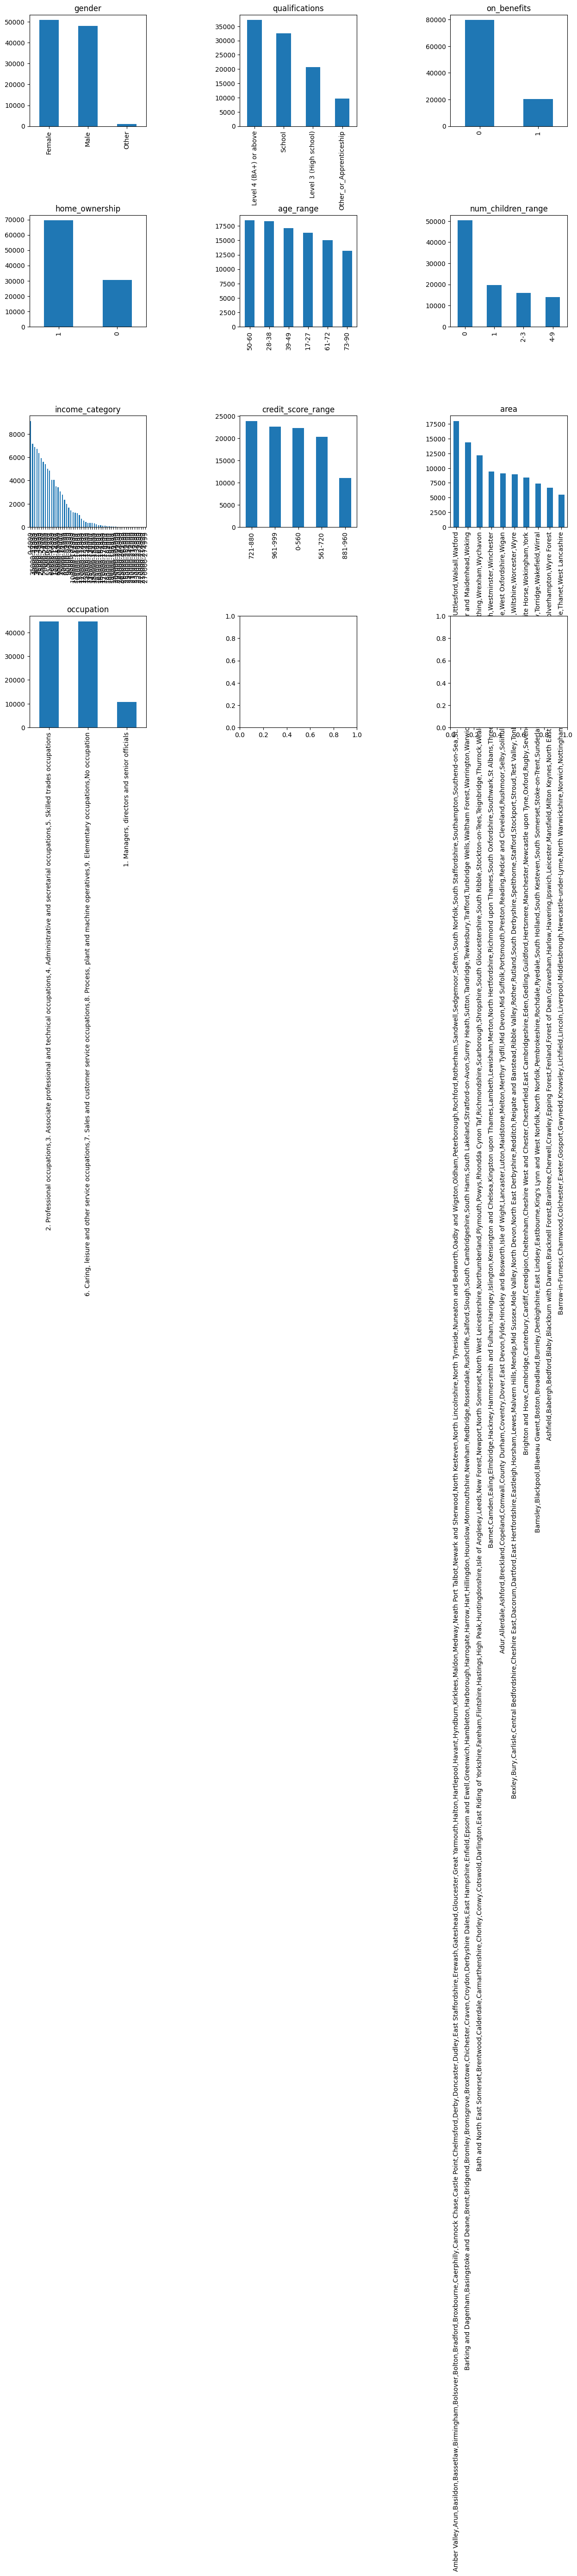

In [158]:
drawHist(dataset)

In [159]:
to_be_removed_records = to_be_removed_after(6,dataset)
for record in to_be_removed_records:
    dataset.drop(record,inplace=True)

['gender', 'qualifications', 'home_ownership', 'age_range', 'num_children_range', 'area', 'occupation']


In [160]:
FinalDataset = dataset

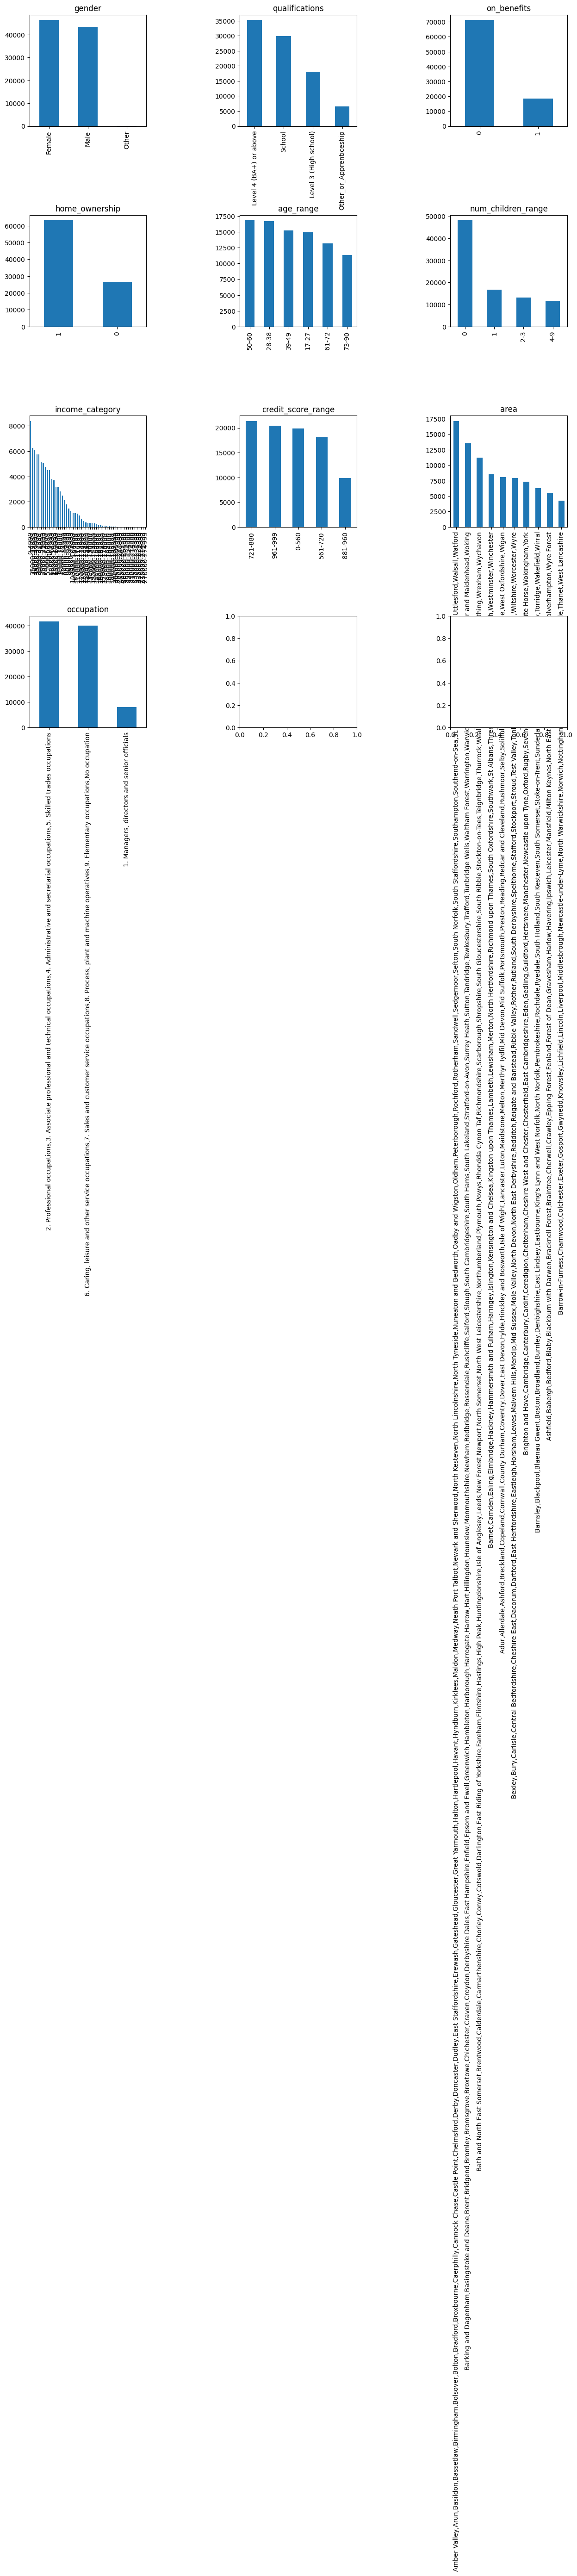

In [161]:
drawHist(FinalDataset)

In [162]:
FinalDataset

gender           qualifications  on_benefits  home_ownership age_range num_children_range income_category credit_score_range                                               area                                         occupation
0      Female    Level 3 (High school)            1               0     28-38                  0          0-4999              0-560  Barrow-in-Furness,Charnwood,Colchester,Exeter,...  6. Caring, leisure and other service occupatio...
1        Male  Other_or_Apprenticeship            0               0     61-72                4-9     45000-49999              0-560  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...  6. Caring, leisure and other service occupatio...
2        Male   Level 4 (BA+) or above            0               1     39-49                  1     45000-49999            881-960  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...  6. Caring, leisure and other service occupatio...
3        Male   Level 4 (BA+) or above            0               1     73-90                  0     45000-49999            721-880  Adur,Allerdale,Ashford,Breckland,Copeland,Corn...  6. Caring, leisure and other service occupatio...
4        Male                   School            1               0     28-38                  0     10000-14999              0-560  Barking and Dagenham,Basingstoke and Deane,Bre...  6. Caring, leisure and other service occupatio...
...       ...                      ...          ...             ...       ...                ...             ...                ...                                                ...                                                ...
99978    Male    Level 3 (High school)            0               1     50-60                  0     65000-69999            961-999  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...  2. Professional occupations,3. Associate profe...
99979  Female   Level 4 (BA+) or above            0               1     17-27                2-3     55000-59999            961-999  Barking and Dagenham,Basingstoke and Deane,Bre...  2. Professional occupations,3. Associate profe...
99980  Female    Level 3 (High school)            1               0     17-27                  0          0-4999              0-560  Amber Valley,Arun,Basildon,Bassetlaw,Birmingha...  6. Caring, leisure and other service occupatio...
99981  Female    Level 3 (High school)            0               1     50-60                  1     45000-49999            721-880  Barrow-in-Furness,Charnwood,Colchester,Exeter,...  6. Caring, leisure and other service occupatio...
99982  Female    Level 3 (High school)            0               1     73-90                  1     50000-54999            961-999  Bexley,Bury,Carlisle,Central Bedfordshire,Ches...  2. Professional occupations,3. Associate profe...

[89726 rows x 10 columns]

In [163]:
eq_class=size_equivalence_classes_after(FinalDataset)
print("Max: " , max(eq_class))
print("Avg: " , np.average(eq_class))
print("Min: " , min(eq_class))

Max:  438
Avg:  20.074806730331968
Min:  6


In [164]:
l_diversity = size_equivalence_classes_diversity_after(FinalDataset)
print("Max: " , max(l_diversity))
print("Avg: " , np.average(l_diversity))
print("Min: " , min(l_diversity))
print(len(l_diversity))

Max:  161
Avg:  1.5617802621570467
Min:  1
56531


In [165]:
def size_equivalence_classes_after1(dataset : pd.DataFrame):
    # Select columns except "income", "credit_score", "on_benefits"
    quasies = dataset[[col for col in dataset.columns if col not in [ "on_benefits"]]]
    # Group by the selected columns and calculate the size of each group
    copyDataset = dataset.groupby(quasies.columns.tolist())
    
    # Print the resulting DataFrame
    # copyDataset
    
    # Return the 'Size' column
    return [len(g[1]) for g in copyDataset]
    

In [166]:
def size_equivalence_classes_after2(dataset : pd.DataFrame):
    # Select columns except "income", "credit_score", "on_benefits"
    quasies = dataset[[col for col in dataset.columns if col not in ["income_category"]]]
    # Group by the selected columns and calculate the size of each group
    copyDataset = dataset.groupby(quasies.columns.tolist())
    
    # Print the resulting DataFrame
    # copyDataset
    
    # Return the 'Size' column
    return [len(g[1]) for g in copyDataset]
    

In [167]:
def size_equivalence_classes_after3(dataset : pd.DataFrame):
    # Select columns except "income", "credit_score", "on_benefits"
    quasies = dataset[[col for col in dataset.columns if col not in [ "credit_score_range"]]]
    # Group by the selected columns and calculate the size of each group
    copyDataset = dataset.groupby(quasies.columns.tolist())
    
    # Print the resulting DataFrame
    # copyDataset
    
    # Return the 'Size' column
    return [len(g[1]) for g in copyDataset]
    

In [168]:
def size_equivalence_classes_after4(dataset : pd.DataFrame):
    # Select columns except "income", "credit_score", "on_benefits"
    quasies = dataset[[col for col in dataset.columns if col not in [ "credit_score_range","income_category"]]]
    # Group by the selected columns and calculate the size of each group
    copyDataset = dataset.groupby(quasies.columns.tolist())
    
    # Print the resulting DataFrame
    # copyDataset
    
    # Return the 'Size' column
    return [len(g[1]) for g in copyDataset]
    

In [169]:
def size_equivalence_classes_after5(dataset : pd.DataFrame):
    # Select columns except "income", "credit_score", "on_benefits"
    quasies = dataset[[col for col in dataset.columns if col not in [ "credit_score_range","on_benefits"]]]
    # Group by the selected columns and calculate the size of each group
    copyDataset = dataset.groupby(quasies.columns.tolist())
    
    # Print the resulting DataFrame
    # copyDataset
    
    # Return the 'Size' column
    return [len(g[1]) for g in copyDataset]
    

In [170]:
def size_equivalence_classes_after6(dataset : pd.DataFrame):
    # Select columns except "income", "credit_score", "on_benefits"
    quasies = dataset[[col for col in dataset.columns if col not in [ "on_benefits","income_category"]]]
    # Group by the selected columns and calculate the size of each group
    copyDataset = dataset.groupby(quasies.columns.tolist())
    
    # Print the resulting DataFrame
    # copyDataset
    
    # Return the 'Size' column
    return [len(g[1]) for g in copyDataset]
    

In [171]:
l_diversity = size_equivalence_classes_after1(FinalDataset)
print("Max: " , max(l_diversity))
print("Avg: " , np.average(l_diversity))
print("Min: " , min(l_diversity))
print(len(l_diversity))

Max:  161
Avg:  1.6008594585773603
Min:  1
55151


In [172]:
l_diversity = size_equivalence_classes_after2(FinalDataset)
print("Max: " , max(l_diversity))
print("Avg: " , np.average(l_diversity))
print("Min: " , min(l_diversity))
print(len(l_diversity))

Max:  247
Avg:  4.15731977209587
Min:  1
21237


In [173]:
l_diversity = size_equivalence_classes_after3(FinalDataset)
print("Max: " , max(l_diversity))
print("Avg: " , np.average(l_diversity))
print("Min: " , min(l_diversity))
print(len(l_diversity))

Max:  256
Avg:  2.809514717581543
Min:  1
31425


In [174]:
l_diversity = size_equivalence_classes_after4(FinalDataset)
print("Max: " , max(l_diversity))
print("Avg: " , np.average(l_diversity))
print("Min: " , min(l_diversity))
print(len(l_diversity))

Max:  393
Avg:  14.02971555696806
Min:  1
6293


In [175]:
l_diversity = size_equivalence_classes_after5(FinalDataset)
print("Max: " , max(l_diversity))
print("Avg: " , np.average(l_diversity))
print("Min: " , min(l_diversity))
print(len(l_diversity))

Max:  257
Avg:  2.9593416906884764
Min:  1
29834


In [176]:
l_diversity = size_equivalence_classes_after6(FinalDataset)
print("Max: " , max(l_diversity))
print("Avg: " , np.average(l_diversity))
print("Min: " , min(l_diversity))
print(len(l_diversity))

Max:  263
Avg:  4.8946113759840335
Min:  1
18038


In [177]:
FinalDataset.to_csv('FinalDataset.csv', encoding='utf-8')

In [180]:
worst_column, size = least_impact_on_k_anonymity(FinalDataset)
print(f"The column with the least impact on k-anonymity is '{worst_column}' with a smallest group size of {size}.")


The column with the least impact on k-anonymity is 'gender' with a smallest group size of 26.
